In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
merge_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice
total_mouse = len(merge_data["Mouse ID"].unique())
print(total_mouse)

249


In [3]:
# Looked if there were any mouse id and timepoint duplicates to remove
mouse_duplicates = merge_data.loc[merge_data.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()

clean_data = merge_data[merge_data["Mouse ID"].isin(mouse_duplicates) == False]

clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# Check the number of mice again
total_clean_mouse = len(clean_data["Mouse ID"].unique())
print(total_clean_mouse)

248


In [5]:
# Grouped the DataFrame
grouped_drug = clean_data.groupby('Drug Regimen')

# Calculate the mean, median, standard deviation, and standard error
average_tumor = grouped_drug['Tumor Volume (mm3)'].mean()

median_tumor = grouped_drug['Tumor Volume (mm3)'].median()

variance_tumor = grouped_drug.var()['Tumor Volume (mm3)']

standard_deviation_tumor = grouped_drug.std()['Tumor Volume (mm3)']

standard_error_mean = grouped_drug.sem()['Tumor Volume (mm3)']

# Created a summary DataFrame
summary_df = pd.DataFrame({"Average Tumor": average_tumor,
                          "Median Tumor": median_tumor,
                          "Variance Tumor": variance_tumor,
                          "Standard Deviation of Tumor": standard_deviation_tumor,
                          "Standard Error of the Mean": standard_error_mean})

# Mapped the DataFrame
summary_df["Average Tumor"] = summary_df["Average Tumor"].map("{:.2f}".format) 
summary_df["Median Tumor"] = summary_df["Median Tumor"].map("{:.2f}".format)
summary_df["Variance Tumor"] = summary_df["Variance Tumor"].map("{:.2f}".format)
summary_df["Standard Deviation of Tumor"] = summary_df["Standard Deviation of Tumor"].map("{:.2f}".format)
summary_df["Standard Error of the Mean"] = summary_df["Standard Error of the Mean"].map("{:.2f}".format)

summary_df

,Average Tumor,Median Tumor,Variance Tumor,Standard Deviation of Tumor,Standard Error of the Mean
Drug Regimen,,,,,
Capomulin,40.68,41.56,24.95,4.99,0.33
Ceftamin,52.59,51.78,39.29,6.27,0.47
Infubinol,52.88,51.82,43.13,6.57,0.49
Ketapril,55.24,53.70,68.55,8.28,0.60
Naftisol,54.33,52.51,66.17,8.13,0.60
Placebo,54.03,52.29,61.17,7.82,0.58
Propriva,52.32,50.45,43.85,6.62,0.54
Ramicane,40.22,40.67,23.49,4.85,0.32
Stelasyn,54.23,52.43,59.45,7.71,0.57


<function matplotlib.pyplot.show(close=None, block=None)>

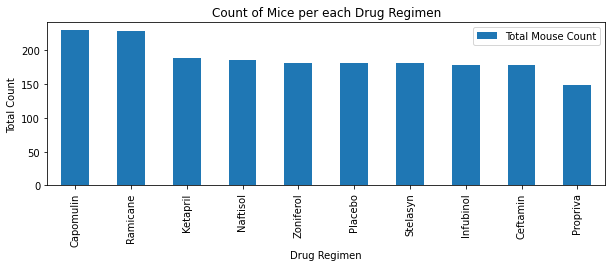

In [6]:
# Counted the values for each drug regimen
drug_counts = clean_data["Drug Regimen"].value_counts()

# Created a summary DataFrame
count_summary = pd.DataFrame({"Total Mouse Count": drug_counts})

# Plot the summary DataFrame to a bar graph
count_summary.plot(kind="bar", figsize=(10,3))


# Added title x and y label to the bar graph
plt.title("Count of Mice per each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Count")

plt.show

Text(0, 0.5, 'Total Count')

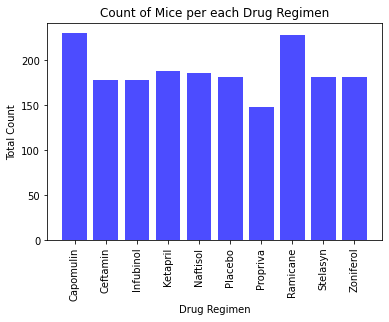

In [7]:
# Created a list with the drug regimen names
drug_names = summary_df.index.tolist()

# Counted the values for each drug regimen and added to a list
count_axis = (clean_data.groupby(["Drug Regimen"])["Mouse ID"].count()).tolist()

# Set x-axis to drug names
x_axis = drug_names

# Plot the bar graph
plt.bar(x_axis, count_axis, color='b', alpha=0.7, align="center")

# Rotated drug names, added title, and added x and y label to the bar graph
plt.xticks(rotation='vertical')
plt.title("Count of Mice per each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Total Count")

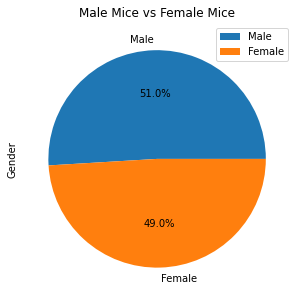

In [54]:
# Counted the values for each sex
gender_counts = clean_data['Sex'].value_counts()

# Created a summary DataFrame
gender_summary = pd.DataFrame({"Gender": gender_counts})

# Plot the summary DataFrame to a pie
plot = gender_summary.plot.pie(y='Gender', figsize=(5, 5), autopct="%1.1f%%")

# Adding a title
plt.title("Male Mice vs Female Mice")
plt.show()

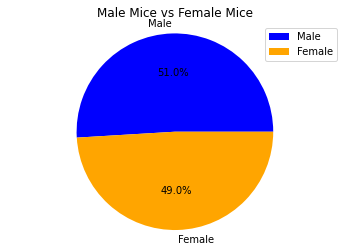

In [9]:
# Index the gender names to a list
label_names = gender_summary.index.tolist()

# Count the number of male and female mice
count_sex = clean_data['Sex'].value_counts().tolist()

# Set color
colors = ["blue", "orange"]

# Plot the list to a pie chart
text = plt.pie(count_sex, labels=label_names, colors=colors, autopct="%1.1f%%")

# Set title, legend, and circular pie chart
plt.title("Male Mice vs Female Mice")
plt.legend(label_names, loc='best')
plt.axis('equal')

# Show the pie chart
plt.show()

In [10]:
# To Calculate the final tumor volume of each mouse across four of the treatment regimens: 
# Capomulin, Ramicane, Infubinol, and Ceftamin
four_regimens = clean_data.groupby(['Mouse ID'])['Timepoint'].max().reset_index()

# Merge the four regimens with the clean data to find the final tumor volume for each mice
final_tumor_df = pd.merge(clean_data, four_regimens, on=["Mouse ID", "Timepoint"], how='right' )

final_tumor_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,a203,Infubinol,Female,20,23,45,67.973419,2
1,a251,Infubinol,Female,21,25,45,65.525743,1
2,a262,Placebo,Female,17,29,45,70.717621,4
3,a275,Ceftamin,Female,20,28,45,62.999356,3
4,a366,Stelasyn,Female,16,29,30,63.440686,1


In [14]:
# Created a list for the four drug regimens
four_regimen_names = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Created a empty list to fill with tumor volume data
tumor_volume = []

# Ran a four loop to append the tumor volume values to the empty list
for tumor in four_regimen_names:
    
    # Use the loc function to get the tumor volumes for the four drug regimens
    tumor_information = final_tumor_df.loc[final_tumor_df['Drug Regimen'] == tumor, 'Tumor Volume (mm3)'] 
    
    # Append it to the empty list
    tumor_volume.append(tumor_information) 

    # Use the quantile function to find the lowerq, upperq, and iqr
    quartiles = tumor_information.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # Find the lower and upper bound
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Find if there are any potential outliers 
    outliers = tumor_information.loc[(tumor_information < lower_bound) | (tumor_information > upper_bound)]
    
    print(f"{tumor} potential outliers {outliers}")

Capomulin potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol potential outliers 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin potential outliers Series([], Name: Tumor Volume (mm3), dtype: float64)


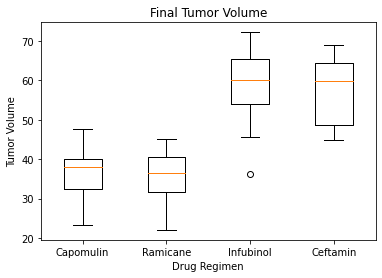

In [23]:
# Plot the ouliers and labels
fig1, ax1 = plt.subplots()
ax1.set_title("Final Tumor Volume")
ax1.set_ylabel("Tumor Volume")
ax1.set_xlabel("Drug Regimen")
ax1.boxplot(tumor_volume)
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

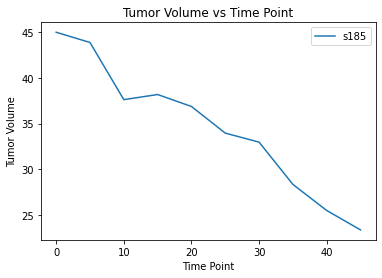

In [33]:
# Use loc function to choose only the Capomulin drug
one_drug = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']


# Use loc function to choose a mice
one_id = one_drug.loc[one_drug['Mouse ID'] == 's185']

# Plot the line graph, add labels, and legend
plt.plot(one_id['Timepoint'], one_id['Tumor Volume (mm3)'])
plt.title("Tumor Volume vs Time Point")
plt.xlabel("Time Point")
plt.ylabel("Tumor Volume")
plt.legend(['s185'])
plt.show()

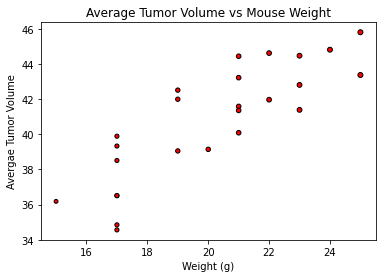

In [61]:
# Use loc function to choose only the Capomulin drug
one_drug = clean_data.loc[clean_data['Drug Regimen'] == 'Capomulin']

# Group by the mouse id and weight
# Use the mean function to find the average tumor volume
average_tumor_volume = one_drug.groupby(['Mouse ID', 'Weight (g)'])['Tumor Volume (mm3)'].mean().reset_index()

# Plot the scatter graph and add labels
plt.scatter(average_tumor_volume['Weight (g)'], average_tumor_volume['Tumor Volume (mm3)'], marker="o", facecolors="red", edgecolors="black", s=average_tumor_volume['Weight (g)'])
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Avergae Tumor Volume")
plt.show()

The correlation between both factors is 0.84


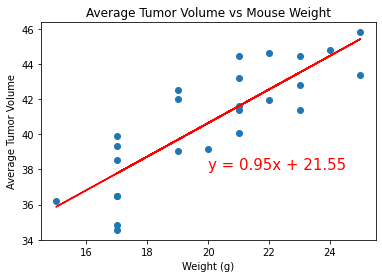

In [62]:
# Calculated the correlation coefficient between mouse weight and average tumor volume for the Capomulin regimen    
weight = average_tumor_volume['Weight (g)'] 
volume = average_tumor_volume['Tumor Volume (mm3)']  
correlation =st.pearsonr(weight, volume)

# Found the linear regression between mouse weight and average tumor volume for the Capomulin regimen  
x_values = average_tumor_volume['Weight (g)']
y_values = average_tumor_volume['Tumor Volume (mm3)']
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot the scatter graph and linear regression
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,38),fontsize=15,color="red")
plt.title("Average Tumor Volume vs Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume")
print(f"The correlation between both factors is {round(correlation[0],2)}")
plt.show()

In [ ]:
# One observation I noticed is the company drug Capomulin has the smallest average tumor and median tumor which is telling us
# that this drug does a better job at decreasing the tumor compared to the other drug treatments available. 

# The second observation I made is from the boxplot Ramicane has the smallest final tumor volume compared to the other three
# drug regimens.

# The third observation I noticed is, there is slightly a larger male population versus the female population by 1.0% which isn't
# a large difference. We could pretty much conclude the male population to female population is relatively equal.

# The fourth observation I noticed in the scatter plot is that if the mice weight more then the average tumor volume will also be
# larger. This means there is a positive correlation between weight and average tumor volume.